<a href="https://colab.research.google.com/github/zarakkhan36/GenAI/blob/main/HW2/problem1cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [11]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets

## 0. Parameters <a name="parameters"></a>

In [13]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [14]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [15]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## **Input Normalization**


* **Batch normalization** layers help normalize the activations within the network, making the training process more stable and faster. However, normalizing the input images before feeding them into the network is still important for several reasons:

* **Consistency**: Normalizing input images ensures that the inputs have a consistent scale, which helps the network learn more effectively.


* **Speed of Convergence**: Normalized inputs can lead to faster convergence during training because the network starts with data on a standard scale.


* **Improved Performance**: Normalizing inputs can help improve the overall performance and accuracy of the model.

## 2. Build the model <a name="build"></a>


* **Leaky ReLU** (Leaky Rectified Linear Unit) is a variant of the **ReLU** (Rectified Linear Unit) activation function. Here's why **Leaky ReLU** is often used:


* **Dying ReLU Problem**: In standard ReLU, if the input to a neuron is negative, the output is zero. If a large number of neurons output zero for a long period during training, they may never activate again. This is known as the "dying ReLU" problem.

* **Leaky ReLU Solution**: Leaky ReLU allows a small, non-zero gradient when the unit is not active. Specifically, it outputs α * x for x < 0 and x for x >= 0, where α (alpha) is a small constant (often 0.01). This small gradient ensures that neurons have a chance to recover during training and continue to update their weights.


* **Standard ReLU**: Can lead to zero gradients when the activation is zero, which means weights of the corresponding neurons are not updated during backpropagation.
Leaky ReLU: Provides a small gradient when the input is negative, ensuring that the backpropagation process can still update the weights, promoting better learning.
Better Performance:

* **Leaky ReLU** has been found to sometimes result in better performance compared to standard ReLU, particularly in deeper networks where the dying ReLU problem can be more pronounced.
Empirical Success:

* In many empirical studies and practical applications, **Leaky ReLU** has shown to improve convergence and achieve higher accuracy compared to standard ReLU, especially in deep learning models.

* The introduction of the negative slope **a** ensures that **Leaky ReLU** never completely dies, thus maintaining a small gradient even for negative inputs.

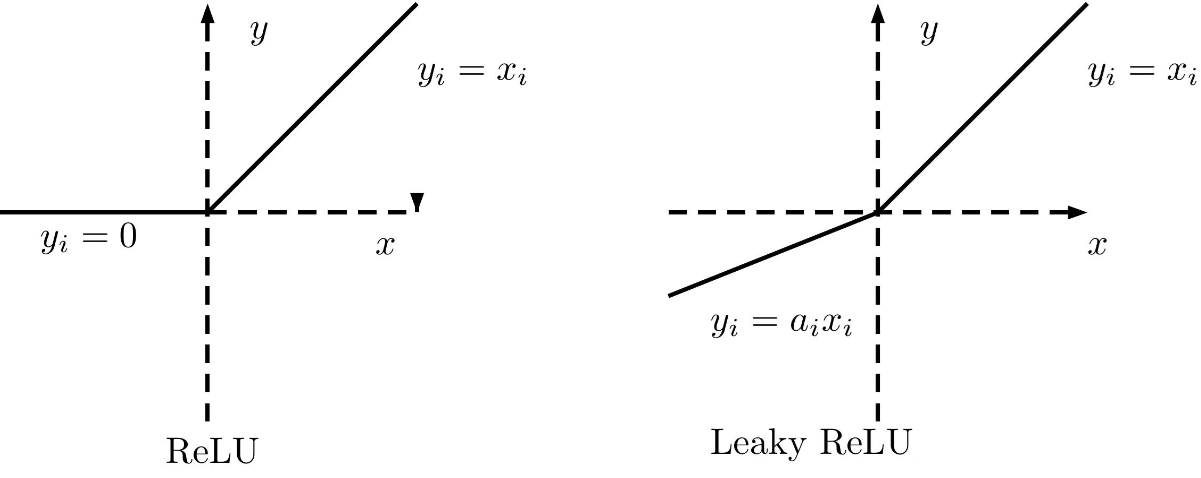

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                            

In [16]:
# Create CNN model
def create_cnn_model(input_shape):
    # Initialize sequential model
    model = models.Sequential()

    # Add first convolutional layer
    # with 32 filters, 1 stride, and relu activation
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=input_shape))

    # Add batch normalization
    model.add(layers.BatchNormalization())

    # Add second convolutional layer
    # wtih 32 filters 2 strides, and relu activation
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same", activation='relu'))

    # Add batch normalization
    model.add(layers.BatchNormalization())

    # Add third convolutional layer
    # with 64 filters, 1 stride, and relu activation
    model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu'))

    # Add batch normalization
    model.add(layers.BatchNormalization())

    # Add fourth convolutional layer
    # with 64 filters, 2 strides, and relu activation
    model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same", activation='relu'))

    # Add batch normalization
    model.add(layers.BatchNormalization())

    # Flatten convolutional layers output
    model.add(layers.Flatten())

    # Add dense layer with 128 units and relu activation
    model.add(layers.Dense(128, activation='relu'))

    # Add batch normalization
    model.add(layers.BatchNormalization())

    # Add dropout layer to reduce overfitting
    model.add(layers.Dropout(rate=0.5))

    # Add output layer with softmax activation, number of units = number of classes
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    # Return model
    return model




## 3. Train the model <a name="train"></a>

In [21]:
# Create new instance of CNN model (32x32, RGB)
cnn_model = create_cnn_model(input_shape=(32, 32, 3))

# Create instance of Adam optimizer
opt = optimizers.Adam(learning_rate=0.0005)

# Compile the model
cnn_model.compile(
    optimizer=opt,  # Use Adam optimizer
    loss="sparse_categorical_crossentropy",  # Use sparse categorical crossentropy loss function
    metrics=["accuracy"]  # Track accuracy
)


In [28]:
# Create history object for storing training data
cnn_history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_split=0.2 # 20% training data used for validation
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 101ms/step - accuracy: 0.4003 - loss: 1.7966 - val_accuracy: 0.5690 - val_loss: 1.2137
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 128s 103ms/step - accuracy: 0.5730 - loss: 1.2048 - val_accuracy: 0.5997 - val_loss: 1.1456
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 97ms/step - accuracy: 0.6611 - loss: 0.9663 - val_accuracy: 0.6706 - val_loss: 0.9323
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 120s 96ms/step - accuracy: 0.7092 - loss: 0.8276 - val_accuracy: 0.7034 - val_loss: 0.8452
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 97ms/step - accuracy: 0.7503 - loss: 0.7200 - val_accuracy: 0.7163 - val_loss: 0.8126
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 97ms/step - accuracy: 0.7758 - loss: 0.6419 - val_accuracy: 0.7150 - val_loss: 0.8151
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 125s 100ms/step - accuracy: 0.8020 - loss: 0.5665 - val_accuracy: 0.7363 - val_loss: 0.7795
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 101ms/step - accura

## 4. Evaluation <a name="evaluate"></a>

In [29]:
cnn_model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 969ms/step - accuracy: 0.7257 - loss: 0.8794


[0.8802185654640198, 0.7269999980926514]

In [30]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = cnn_model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[y_test]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


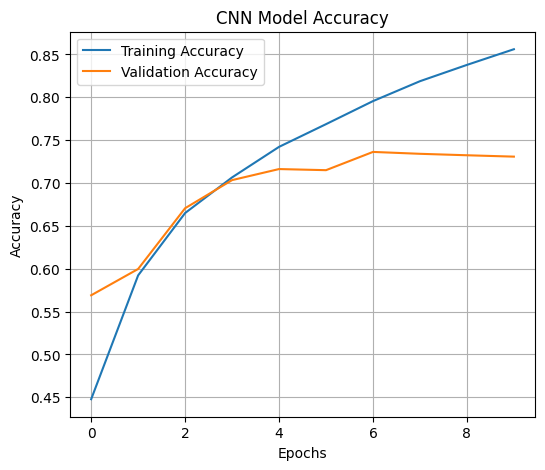

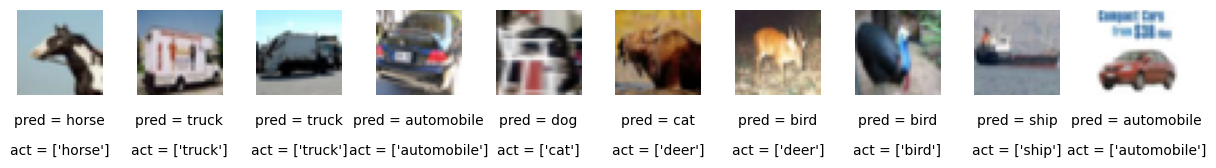

In [32]:
import matplotlib.pyplot as plt

# Plotting CNN Accuracy
plt.figure(figsize=(6, 5))

# Training and validation accuracy for CNN
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Show plot
plt.show()

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)